In [10]:
import os
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import download
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from numpy.linalg import norm
import numpy as np


# Diagrama 2D de los embeddings 

## METODO 1: T-SNE

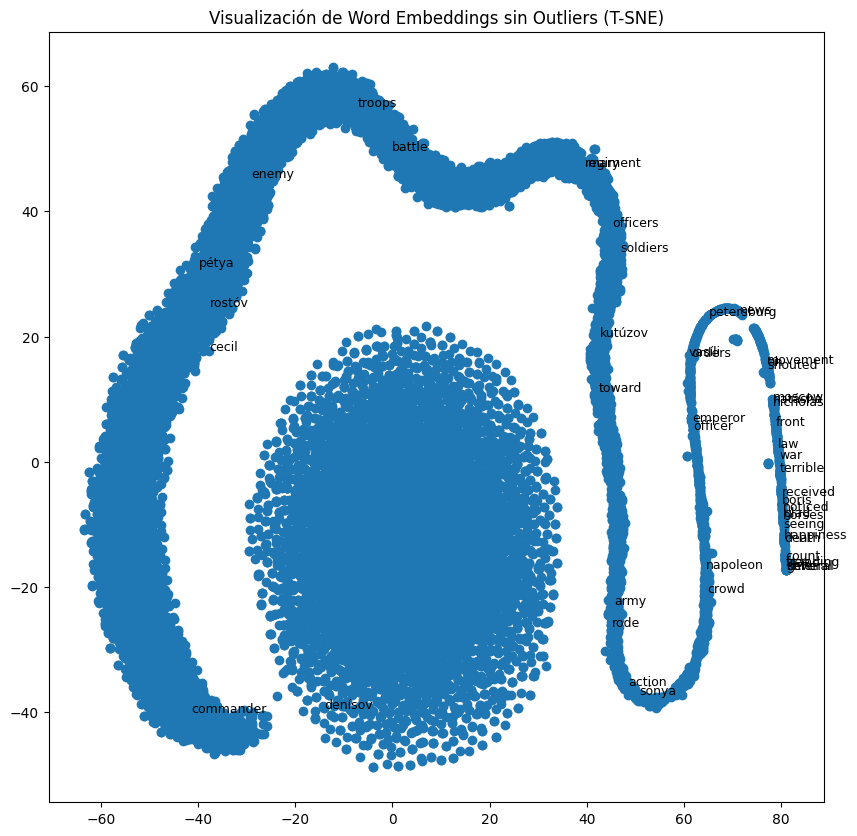

In [9]:


def plot_embeddings(name):
    model = Word2Vec.load(f'{name}.model') 

    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    norms = norm(word_vectors, axis=1)

    threshold = np.mean(norms) + 2 * np.std(norms)

    filtered_words = [word for i, word in enumerate(words) if norms[i] < threshold]
    filtered_vectors = np.array([vec for i, vec in enumerate(word_vectors) if norms[i] < threshold])

  
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    filtered_vectors_2d = tsne.fit_transform(filtered_vectors)

  
    plt.figure(figsize=(10, 10))
    plt.scatter(filtered_vectors_2d[:, 0], filtered_vectors_2d[:, 1])

  
    for i, word in enumerate(filtered_words[:50]):  
        plt.annotate(word, xy=(filtered_vectors_2d[i, 0], filtered_vectors_2d[i, 1]), fontsize=9)

    plt.title("Visualización de Word Embeddings sin Outliers (T-SNE)")

    plt.show()


plot_embeddings('Books_300_EMF')


## Metodo 2: PCA

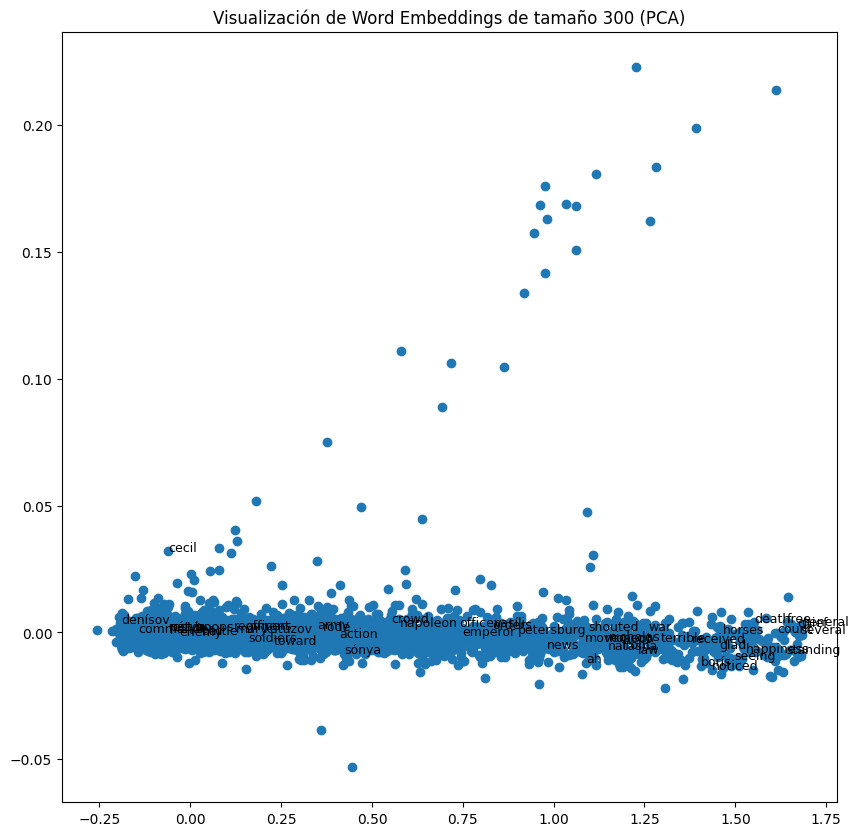

In [11]:


def plot_embeddings2(name):
    model = Word2Vec.load(f'{name}.model') 

    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]


    norms = norm(word_vectors, axis=1)
    threshold = np.mean(norms) + 2 * np.std(norms)

    filtered_words = [word for i, word in enumerate(words) if norms[i] < threshold]
    filtered_vectors = np.array([vec for i, vec in enumerate(word_vectors) if norms[i] < threshold])


    pca = PCA(n_components=2)
    filtered_vectors_2d = pca.fit_transform(filtered_vectors)


    plt.figure(figsize=(10, 10))
    plt.scatter(filtered_vectors_2d[:, 0], filtered_vectors_2d[:, 1])


    for i, word in enumerate(filtered_words[:50]):  
        plt.annotate(word, xy=(filtered_vectors_2d[i, 0], filtered_vectors_2d[i, 1]), fontsize=9)

    plt.title("Visualización de Word Embeddings de tamaño 300 (PCA)")
    plt.show()
plot_embeddings2('Books_300_EMF')

# Visualizacion de las palabras mas similares a los nombres de los personajes principales.

## T-SNE: Para embeddigns de tamaño 100

Similar words for lucy:
george: 0.9998550415039062
helen: 0.9998408555984497
may: 0.9998342394828796
margaret: 0.9998306035995483
end: 0.9998268485069275
Similar words for lilia:
might: 0.9998890161514282
much: 0.999886155128479
take: 0.9998855590820312
day: 0.9998823404312134
even: 0.9998811483383179
Similar words for honeychurch:
lavish: 0.9994627237319946
bartlett: 0.9992949366569519
miss: 0.9991844296455383
lucy: 0.9991362690925598
mr: 0.9990030527114868
Similar words for bast:
company: 0.9820578098297119
occasional: 0.9815937876701355
lights: 0.9813086986541748
surprised: 0.9811360836029053
piazza: 0.981037974357605
Similar words for herriton:
arbuthnot: 0.9992524981498718
wilkins: 0.9990244507789612
munt: 0.9986093044281006
fisher: 0.9979016184806824
mrs: 0.9971453547477722
Similar words for lucy:
george: 0.9998550415039062
helen: 0.9998408555984497
may: 0.9998342394828796
margaret: 0.9998306035995483
end: 0.9998268485069275
Similar words for wilcox:
oh: 0.9997166991233826
asked:

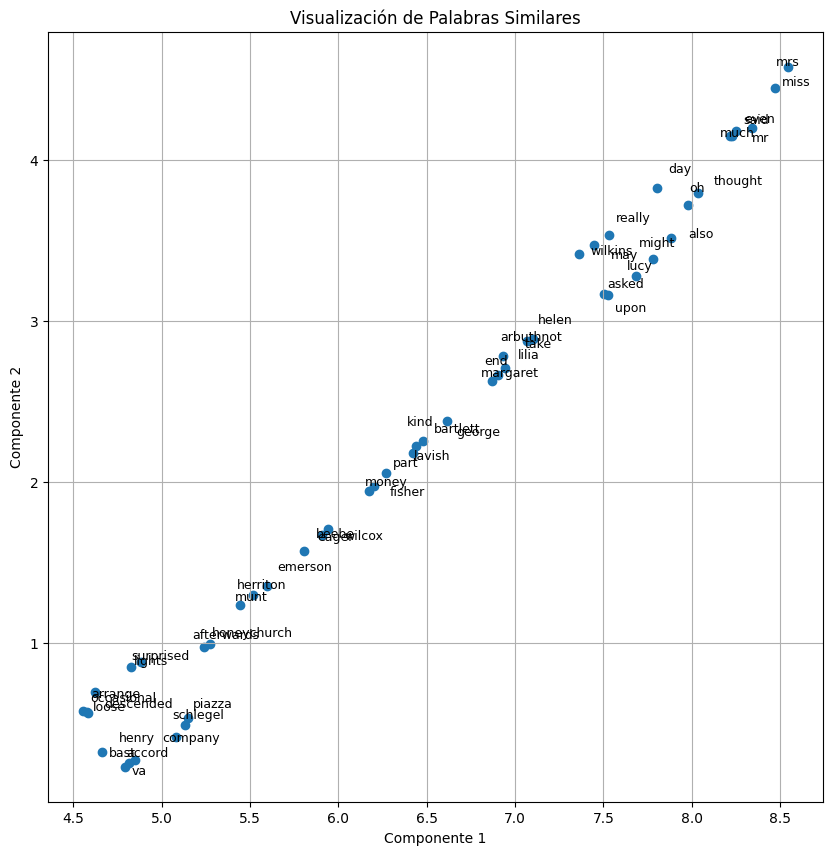

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  

    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_100_EMF', 'lucy')   
find_similar('Books_100_EMF', 'lilia' )
find_similar('Books_100_EMF', 'honeychurch' )
find_similar('Books_100_EMF', 'bast' )
find_similar('Books_100_EMF', 'herriton' )
find_similar('Books_100_EMF', 'lucy' )
find_similar('Books_100_EMF', 'wilcox' )
find_similar('Books_100_EMF', 'margaret' )
find_similar('Books_100_EMF', 'schlegel' )
find_similar('Books_100_EMF', 'emerson' )
find_similar('Books_100_EMF', 'henry' )

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)


plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.1, 0.1) 
    offset_y = np.random.uniform(-0.1, 0.1)  
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)


plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

## T-SNE: Para embeddigns de tamaño 300

Similar words for lucy:
began: 0.9999526739120483
also: 0.999949038028717
went: 0.9999472498893738
upon: 0.9999451637268066
might: 0.9999426603317261
Similar words for nikoláevich:
disengage: 0.1966858059167862
undertake: 0.19263915717601776
artless: 0.1846146583557129
unwound: 0.18444420397281647
poland: 0.18241369724273682
Similar words for lilia:
could: 0.999960720539093
much: 0.9999597072601318
away: 0.9999580979347229
time: 0.9999579191207886
even: 0.9999575018882751
Similar words for honeychurch:
lavish: 0.999793291091919
bartlett: 0.9997133612632751
miss: 0.9996681809425354
lucy: 0.9996656179428101
abbott: 0.9996567368507385
Similar words for bast:
fond: 0.9927392601966858
early: 0.9926889538764954
story: 0.9926535487174988
drawing: 0.9926510453224182
chance: 0.9926376938819885
Similar words for herriton:
munt: 0.9997056126594543
arbuthnot: 0.9996668100357056
wilkins: 0.9996170997619629
fisher: 0.9992556571960449
said: 0.9990719556808472
Similar words for wilcox:
indeed: 0.99985

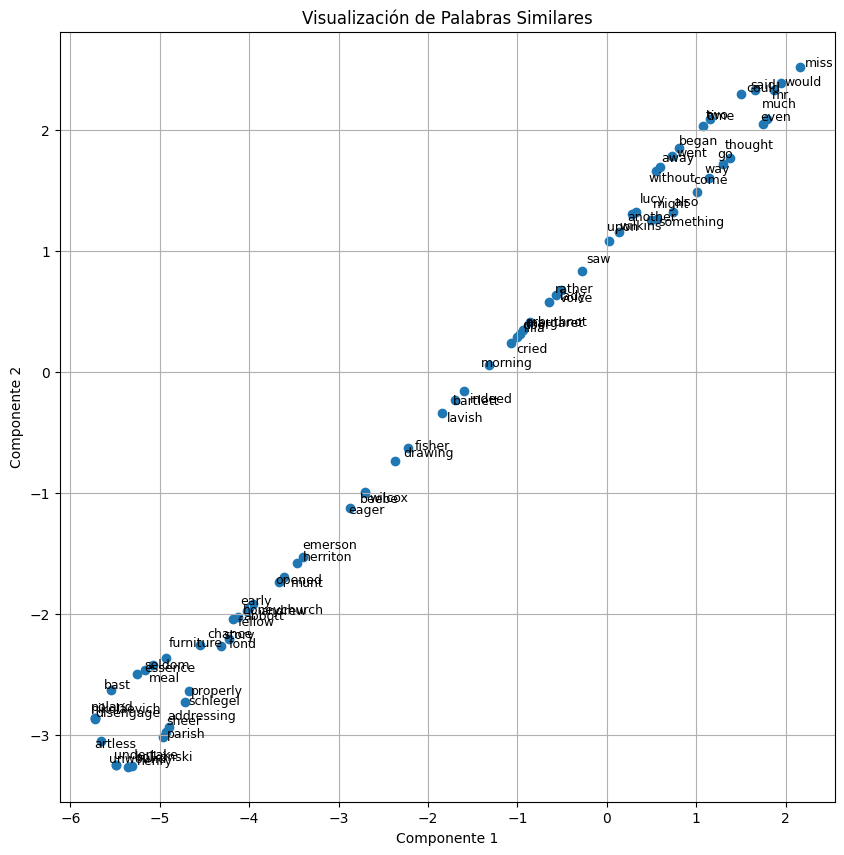

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  
    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_200_EMF', 'lucy')           
find_similar('Books_300_EMF', 'nikoláevich')        
find_similar('Books_300_EMF', 'lilia')          
find_similar('Books_300_EMF', 'honeychurch')    
find_similar('Books_300_EMF', 'bast')           
find_similar('Books_300_EMF', 'herriton')       
find_similar('Books_300_EMF', 'wilcox')         
find_similar('Books_300_EMF', 'margaret')      
find_similar('Books_300_EMF', 'schlegel')       
find_similar('Books_300_EMF', 'emerson')       
find_similar('Books_300_EMF', 'henry')       
find_similar('Books_300_EMF', 'andrew')       
find_similar('Books_300_EMF', 'bolkónski')     

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)


plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.1, 0.1)  
    offset_y = np.random.uniform(-0.1, 0.1) 
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)


plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()


## T-SNE: Para embeddigns de tamaño 200

Similar words for lucy:
began: 0.9999526739120483
also: 0.999949038028717
went: 0.9999472498893738
upon: 0.9999451637268066
might: 0.9999426603317261
Similar words for nikoláevich:
corporal: 0.3303017020225525
girths: 0.2521129846572876
shreds: 0.24713397026062012
farthest: 0.24435724318027496
wobbly: 0.23323693871498108
Similar words for lilia:
could: 0.9999376535415649
felt: 0.9999355673789978
little: 0.9999353885650635
away: 0.9999349117279053
think: 0.9999337792396545
Similar words for honeychurch:
lavish: 0.9996421337127686
bartlett: 0.9996117353439331
mr: 0.9995090961456299
lucy: 0.9995060563087463
miss: 0.9995019435882568
Similar words for bast:
voices: 0.9905844926834106
beebe: 0.9903973937034607
literature: 0.990330696105957
leaning: 0.990325927734375
dream: 0.9902821779251099
Similar words for herriton:
arbuthnot: 0.9997486472129822
wilkins: 0.9997400045394897
munt: 0.9996833801269531
fisher: 0.9995864033699036
said: 0.9994067549705505
Similar words for wilcox:
even: 0.999830

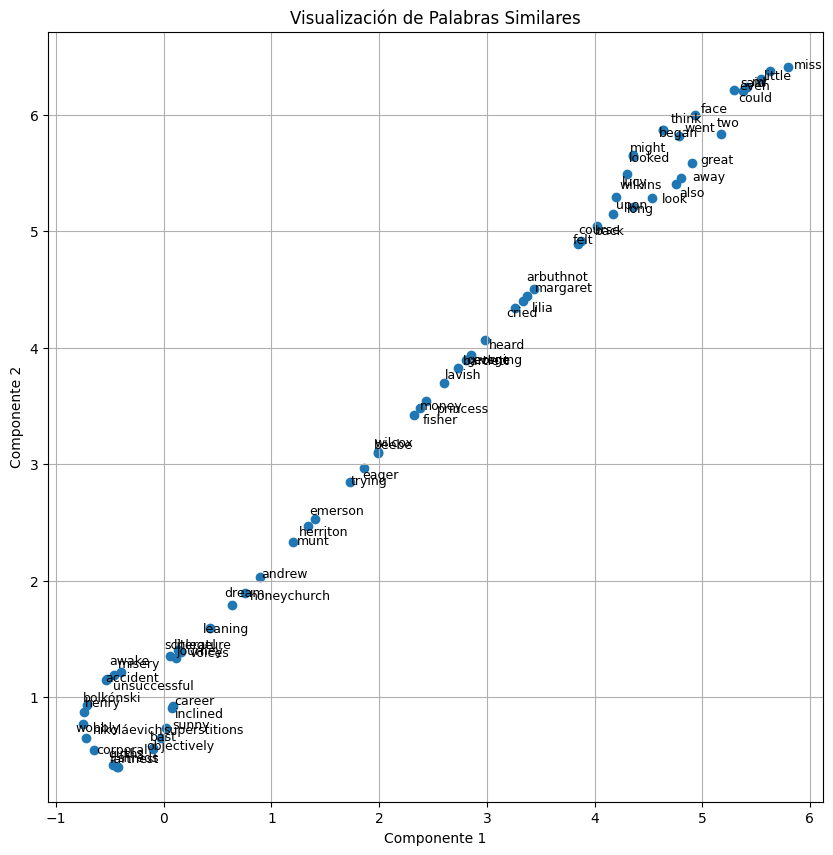

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  

    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_200_EMF', 'lucy')           
find_similar('Books_200_EMF', 'nikoláevich')        
find_similar('Books_200_EMF', 'lilia')          
find_similar('Books_200_EMF', 'honeychurch')    
find_similar('Books_200_EMF', 'bast')           
find_similar('Books_200_EMF', 'herriton')       
find_similar('Books_200_EMF', 'wilcox')         
find_similar('Books_200_EMF', 'margaret')      
find_similar('Books_200_EMF', 'schlegel')       
find_similar('Books_200_EMF', 'emerson')       
find_similar('Books_200_EMF', 'henry')       
find_similar('Books_200_EMF', 'andrew')       
find_similar('Books_200_EMF', 'bolkónski')     

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors)


plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.1, 0.1)  
    offset_y = np.random.uniform(-0.1, 0.1) 
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)


plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()


# PCA: Para embeddigns de tamaño 100

Similar words for lucy:
george: 0.9998550415039062
helen: 0.9998408555984497
may: 0.9998342394828796
margaret: 0.9998306035995483
end: 0.9998268485069275
Similar words for nikoláevich:
blotch: 0.3732086718082428
wintry: 0.37183672189712524
eustace: 0.3438625633716583
inconsistent: 0.3414554297924042
occupying: 0.33140742778778076
Similar words for lilia:
might: 0.9998890161514282
much: 0.999886155128479
take: 0.9998855590820312
day: 0.9998823404312134
even: 0.9998811483383179
Similar words for honeychurch:
lavish: 0.9994627237319946
bartlett: 0.9992949366569519
miss: 0.9991844296455383
lucy: 0.9991362690925598
mr: 0.9990030527114868
Similar words for bast:
company: 0.9820578098297119
occasional: 0.9815937876701355
lights: 0.9813086986541748
surprised: 0.9811360836029053
piazza: 0.981037974357605
Similar words for herriton:
arbuthnot: 0.9992524981498718
wilkins: 0.9990244507789612
munt: 0.9986093044281006
fisher: 0.9979016184806824
mrs: 0.9971453547477722
Similar words for wilcox:
oh: 0

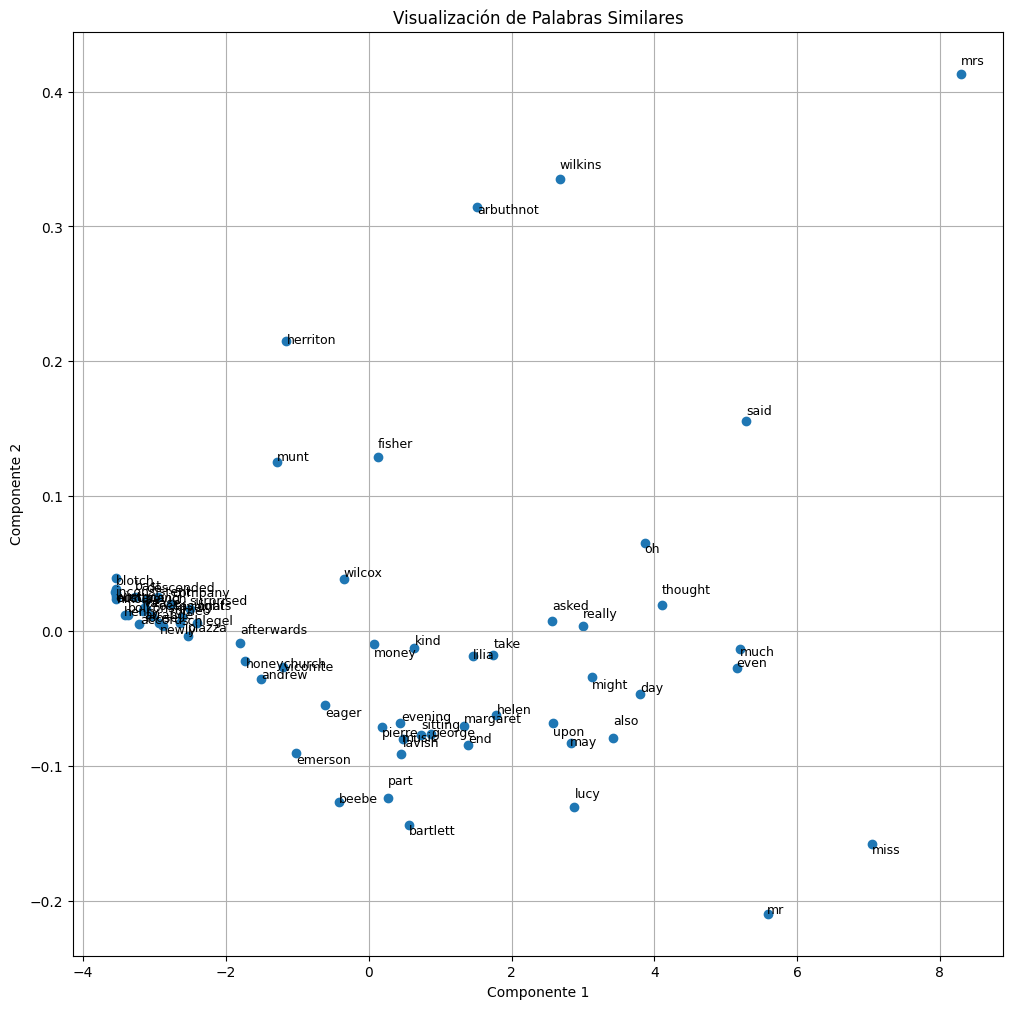

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  

    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_100_EMF', 'lucy')           
find_similar('Books_100_EMF', 'nikoláevich')        
find_similar('Books_100_EMF', 'lilia')          
find_similar('Books_100_EMF', 'honeychurch')    
find_similar('Books_100_EMF', 'bast')           
find_similar('Books_100_EMF', 'herriton')       
find_similar('Books_100_EMF', 'wilcox')         
find_similar('Books_100_EMF', 'margaret')      
find_similar('Books_100_EMF', 'schlegel')       
find_similar('Books_100_EMF', 'emerson')       
find_similar('Books_100_EMF', 'henry')       
find_similar('Books_100_EMF', 'andrew')       
find_similar('Books_100_EMF', 'bolkónski')     

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


plt.figure(figsize=(12, 12))  
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.01, 0.01) 
    offset_y = np.random.uniform(-0.01, 0.01)  
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)

plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

# PCA: Para embeddigns de tamaño 200

Similar words for lucy:
began: 0.9999526739120483
also: 0.999949038028717
went: 0.9999472498893738
upon: 0.9999451637268066
might: 0.9999426603317261
Similar words for nikoláevich:
corporal: 0.3303017020225525
girths: 0.2521129846572876
shreds: 0.24713397026062012
farthest: 0.24435724318027496
wobbly: 0.23323693871498108
Similar words for lilia:
could: 0.9999376535415649
felt: 0.9999355673789978
little: 0.9999353885650635
away: 0.9999349117279053
think: 0.9999337792396545
Similar words for honeychurch:
lavish: 0.9996421337127686
bartlett: 0.9996117353439331
mr: 0.9995090961456299
lucy: 0.9995060563087463
miss: 0.9995019435882568
Similar words for bast:
voices: 0.9905844926834106
beebe: 0.9903973937034607
literature: 0.990330696105957
leaning: 0.990325927734375
dream: 0.9902821779251099
Similar words for herriton:
arbuthnot: 0.9997486472129822
wilkins: 0.9997400045394897
munt: 0.9996833801269531
fisher: 0.9995864033699036
said: 0.9994067549705505
Similar words for wilcox:
even: 0.999830

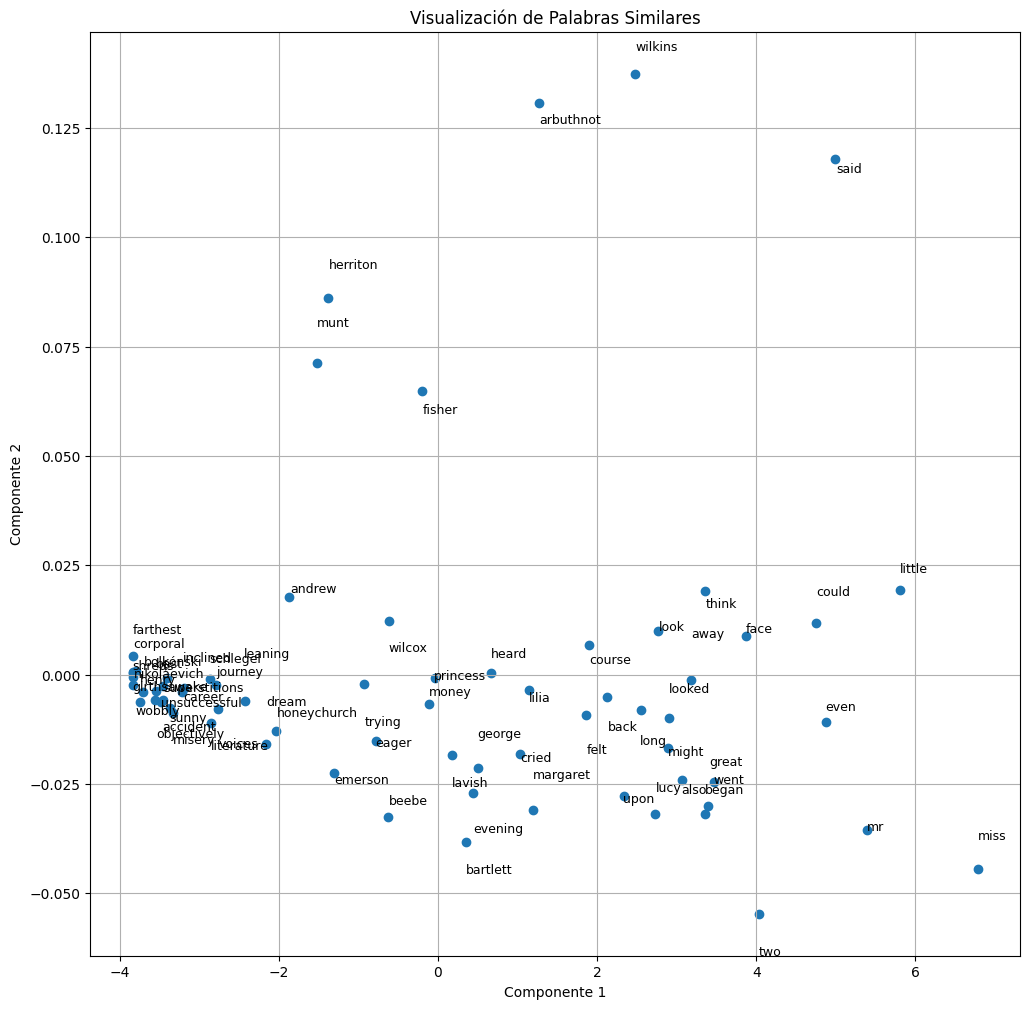

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  

    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_200_EMF', 'lucy')           
find_similar('Books_200_EMF', 'nikoláevich')        
find_similar('Books_200_EMF', 'lilia')          
find_similar('Books_200_EMF', 'honeychurch')    
find_similar('Books_200_EMF', 'bast')           
find_similar('Books_200_EMF', 'herriton')       
find_similar('Books_200_EMF', 'wilcox')         
find_similar('Books_200_EMF', 'margaret')      
find_similar('Books_200_EMF', 'schlegel')       
find_similar('Books_200_EMF', 'emerson')       
find_similar('Books_200_EMF', 'henry')       
find_similar('Books_200_EMF', 'andrew')       
find_similar('Books_200_EMF', 'bolkónski')     

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


plt.figure(figsize=(12, 12))  
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.01, 0.01)  
    offset_y = np.random.uniform(-0.01, 0.01) 
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)

plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()

# PCA: Para embeddigns de tamaño 300

Similar words for lucy:
rather: 0.9999596476554871
told: 0.9999581575393677
also: 0.9999561905860901
felt: 0.9999556541442871
without: 0.9999556541442871
Similar words for nikoláevich:
disengage: 0.1966858059167862
undertake: 0.19263915717601776
artless: 0.1846146583557129
unwound: 0.18444420397281647
poland: 0.18241369724273682
Similar words for lilia:
could: 0.999960720539093
much: 0.9999597072601318
away: 0.9999580979347229
time: 0.9999579191207886
even: 0.9999575018882751
Similar words for honeychurch:
lavish: 0.999793291091919
bartlett: 0.9997133612632751
miss: 0.9996681809425354
lucy: 0.9996656179428101
abbott: 0.9996567368507385
Similar words for bast:
fond: 0.9927392601966858
early: 0.9926889538764954
story: 0.9926535487174988
drawing: 0.9926510453224182
chance: 0.9926376938819885
Similar words for herriton:
munt: 0.9997056126594543
arbuthnot: 0.9996668100357056
wilkins: 0.9996170997619629
fisher: 0.9992556571960449
said: 0.9990719556808472
Similar words for wilcox:
indeed: 0.9

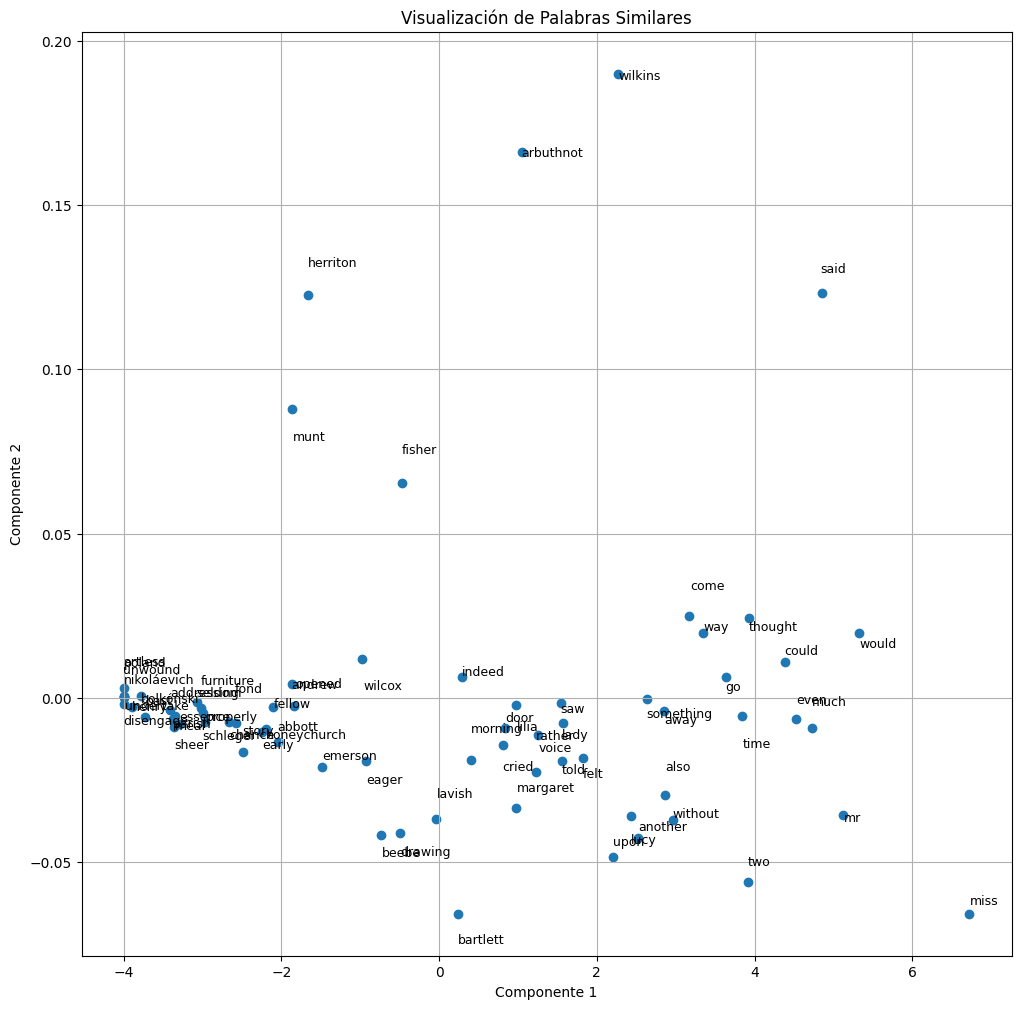

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


all_similar_words = []

def find_similar(name_model, word):
    global all_similar_words  

    model = Word2Vec.load(f'{name_model}.model') 
    
    similar_words = model.wv.most_similar(word, topn=5)
    
    print(f'Similar words for {word}:')
    for similar_word, similarity in similar_words:
        print(f'{similar_word}: {similarity}')
        all_similar_words.append(similar_word)

    all_similar_words.append(word)
    return model




model = find_similar('Books_300_EMF', 'lucy')           
find_similar('Books_300_EMF', 'nikoláevich')        
find_similar('Books_300_EMF', 'lilia')          
find_similar('Books_300_EMF', 'honeychurch')    
find_similar('Books_300_EMF', 'bast')           
find_similar('Books_300_EMF', 'herriton')       
find_similar('Books_300_EMF', 'wilcox')         
find_similar('Books_300_EMF', 'margaret')      
find_similar('Books_300_EMF', 'schlegel')       
find_similar('Books_300_EMF', 'emerson')       
find_similar('Books_300_EMF', 'henry')       
find_similar('Books_300_EMF', 'andrew')       
find_similar('Books_300_EMF', 'bolkónski')     

words_to_plot = list(set(all_similar_words)) 
word_vectors = np.array([model.wv[w] for w in words_to_plot if w in model.wv])

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


plt.figure(figsize=(12, 12))  
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

for i, w in enumerate(words_to_plot):
    offset_x = np.random.uniform(-0.01, 0.01) 
    offset_y = np.random.uniform(-0.01, 0.01) 
    plt.annotate(w, xy=(word_vectors_2d[i, 0] + offset_x, word_vectors_2d[i, 1] + offset_y), fontsize=9)

plt.title("Visualización de Palabras Similares")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
plt.show()